## Preface
(Basically notes  from here:)<br>
Guide by original authors: https://arxiv.org/pdf/1906.02691.pdf

A major division in ML is generative vs discriminative models. Lets consider both from the context of modeling fruit pictures<br>
*Convention:*<br>
*x - the image of the fruit*
*z - the label of the fruit (also the distribution of that fruit)*
*   **discriminative** - model learns p(z|x)<br>
*   **generative** - model learns p(x|z)<br>
generative models can still be used for classification, but it requires using bayes rule which can be computationally expensive. Also generative models tend to make more assumptions about the underlying structures in data.

## Questions
*   Why is bayes rule intractable in machine learning?
*   Will AEs converge to VAEs if the dimmensionality of the latent space is small?

# Variational Autoencoder
Original Paper: https://arxiv.org/pdf/1312.6114.pdf <br>
Guide by original authors: https://arxiv.org/pdf/1906.02691.pdf
Shoutouts:
* https://www2.bcs.rochester.edu/sites/jacobslab/cheat_sheet/VariationalAutoEncoder.pdf
* https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73

$z -> x -> p(z|x) -> \hat{z} -> p(x|\hat{z}) -> \hat{x}$

## KL Divergence
Motivation: As a distance metric to quantify the difference between two distributions. <br>
Key features:
* Independent of normalization factor
* Independent of scale factors as well

## Derivation 1

| | D1 | D2 |
| --- | --- | --- |
|p(a)| .8| .3|
|p(b)| .1| .3|
|p(c)| .1| .4|

Some sequence X **taken from D1**: abcba

Ratio to see distribution simmilarity: $\frac{p(X|D1)}{p(X|D2)}$
* closer to one means distributions are closer

Probability p(X|D1) = $p_{D1}(a)^{n_a} * p_{D1}(b)^{n_b} * p_{D1}(c)^{n_c}$ <br>
Probability p(X|D2) = $p_{D2}(a)^{n_a} * p_{D2}(b)^{n_b} * p_{D2}(c)^{n_c}$

Generalization:

$$\frac{p_{D1}(a)^{n_a} * p_{D1}(b)^{n_b} * p_{D1}(c)^{n_c}}{p_{D2}(a)^{n_a} * p_{D2}(b)^{n_b} * p_{D2}(c)^{n_c}}$$

Now put a log on it and exponent to normalize for scaling factors and the sequence size:

$$log(\frac{p_{D1}(a)^{n_a} * p_{D1}(b)^{n_b} * p_{D1}(c)^{n_c}}{p_{D2}(a)^{n_a} * p_{D2}(b)^{n_b} * p_{D2}(c)^{n_c}})^{\frac{1}{n}}$$

Now simplify:

$$\frac{n_a}{n}log(p_{D1}(a)) + \frac{n_b}{n}log(p_{D1}(b)) + \frac{n_c}{n}log(p_{D1}(c)) - \frac{n_a}{n}log(p_{D2}(a)) + \frac{n_b}{n}log(p_{D2}(b)) + \frac{n_c}{n}log(p_{D2}(c))$$

Recall that we are taking our random draw X from  D1, so as N -> big the ratio $\frac{n_a}{n} -> p_{D1}(a)$<br>
**Note:** If we were to assume the random draw X was from D1 then the ration would collapse to $p_{D2}(a)$, instead. This is why KL divergences is **Asymetric**. $D_{KL}(D1 || D2) \neq D_{KL}(D2 || D1)$

$$p_{D1}(a)log(p_{D1}(a)) + p_{D1}(b)log(p_{D1}(b)) + p_{D1}(c)log(p_{D1}(c)) - p_{D1}(a)log(p_{D2}(a)) - p_{D1}(b)log(p_{D2}(b)) - p_{D1}(c)log(p_{D2}(c))$$ <br>

re-arrange:

$$p_{D1}(a)log(p_{D1}(a)) - p_{D1}(a)log(p_{D2}(a)) + p_{D1}(b)log(p_{D1}(b)) - p_{D1}(b)log(p_{D2}(b)) + p_{D1}(c)log(p_{D1}(c)) - p_{D1}(c)log(p_{D2}(c))$$ <br>

Simplify:

$$p_{D1}(a)log(\frac{p_{D1}(a)}{p_{D2}(a)}) +p_{D1}(b)log(\frac{p_{D1}(b)}{p_{D2}(b)}) + p_{D1}(c)log(\frac{p_{D1}(c)}{p_{D2}(c)}) $$

Generalize for more M classes instead of just 3:

$$ \sum_i^m p_{D1}(i)log(\frac{p_{D1}(i)}{p_{D2}(i)}) $$

Generalize for Continuous distributions instead of discreet:

$$\int_{-\infty}^{\infty} p_{D1}(x)log(\frac{p_{D1}(x)}{p_{D2}(x)}) dx$$

or
$$\int_{x \sim D1} p_{D1}(x)log(\frac{p_{D1}(x)}{p_{D2}(x)}) dx$$

Equivalent to 

$$D_{KL} = \mathbb{E}_{x \sim D1(x)} [log(\frac{p_{D1}(x)}{p_{D2}(x)})]$$


# Take 1

**Motivation:**
<br>
Our purpose is to learn the generative
process, i.e., p(x|z) (we assume p(z) is known). A good p(x|z) would assign high probabilities to
observed x; hence, we can learn a good p(x|z) by maximizing the probability of observed data,
i.e., p(x). Assuming that p(x|z) is parameterized by θ, we need to solve the following optimization
problem. Which is to maximize the following:
<br>

$$p_\theta(x) = \int_zp_\theta(x|z)p(z)dz $$



Because that is the probability of $x \cup z$. In this case, the x is our samples which we have "drawn" from the "imaginary" distribution z. In other words this is the probability of us getting the data that we have. Since our samples obviously exist, we want $p_\theta(x)$ to be closer to 1.<br>
Unfortunately, taking the integral over $p(x)$ is intractable (aka very computationally expensive) when dealing with high dimmensions.<br>
<br>
The solution is to actually take a step back and look at a different part of the VAE, and that is the decoder **$p_\theta(z|x)$**, we can't actually integrate over that though since it is a latent mapping that we don't know. Instead the best we can do is try to apporoximate it with our own version **$q_\phi(z|x)$**.<br>
To do this we use **Variational Inference** with **KL divergence**.Aka, want to minimize the $D_{KL}(q_\phi(z|x) || p_\theta(z|x))$
$$
\begin{align}
D_{KL}(q_\theta(z|x) || p_\theta(z|x)) & = \int_{z}(q_\phi(z|x)log(\frac{q_\phi(z|x)}{p_\theta(z|x)}dz \\
& = \int_{z}(q_\phi(z|x)log(\frac{q_\phi(z|x)p_\theta(x)}{p_\theta(z,x)})dz \\
& = \int_{z}(q_\phi(z|x)\bigg(log\big(\frac{q_\phi(z|x)}{p_\theta(z,x)}\big) + log\big(p_\theta(x)\big)\bigg)dz \\
& = \int_{z}(q_\phi(z|x)\bigg(log\big(\frac{q_\phi(z|x)}{p_\theta(z,x)}\big)\bigg)dz + \int_{z}(q_\phi(z|x)log\big(p_\theta(x)\big)dz \\
D_{KL}(q_\theta(z|x) || p_\theta(z|x)) & = \int_{z}(q_\phi(z|x)\bigg(log\big(\frac{q_\phi(z|x)}{p_\theta(z,x)}\big)\bigg)dz + log\big(p_\theta(x)\big) \\
\end{align}
$$
Now use substitution with:
$$-\mathcal{L}(\phi, \theta) = \int_{z}(q_\phi(z|x)\bigg(log\big(\frac{q_\phi(z|x)}{p_\theta(z,x)}\big)\bigg)dz$$

$$
\begin{align}
D_{KL}(q_\theta(z|x) || p_\theta(z|x)) & =  - \mathcal{L}(\phi, \theta) + log\big(p_\theta(x)\big) \\
D_{KL}(q_\theta(z|x) || p_\theta(z|x)) + \mathcal{L}(\phi, \theta) & =  log\big(p_\theta(x)\big) \\
\end{align}
$$

Since KL Divergence has to be >= 0, we can re-write this as:
$$\mathcal{L}(\phi, \theta) <=  log\big(p_\theta(x)\big)$$

Reminder that our original objective was to maximize $p_\theta(x)$. We can do this by maximizing $\mathcal{L}(\phi, \theta)$, which is the lower bound for $p_\theta(x)$.

### Useful formulas:

$$p(a|b) = \frac{p(b|a)p(a)}{p(b)}$$
$$p(a|b)p(b) = p(a,b) = p(b,a) = p(b|a)p(a)$$

$$\mathbb{E}_{x \sim D1} f() = \int_xp(x)f()$$

$$\int_{z}(q_\phi(z|x)f()dz = f()$$

The maximization problem, to maximize $\mathcal{L}(\phi, \theta)$ with respect to $\phi$ and $\theta$ <br>
($\mathcal{L}(\phi, \theta)$ is commonly reffered to as "ELBO")

$$-\mathcal{L}(\phi, \theta) = \int_{z}(q_\phi(z|x)\bigg(log\big(\frac{q_\phi(z|x)}{p_\theta(z,x)}\big)\bigg)dz$$
$$\mathcal{L}(\phi, \theta) = \int_{z}(q_\phi(z|x)\bigg(log\big(\frac{p_\theta(z,x)}{q_\phi(z|x)}\big)\bigg)dz$$


In practice this can be written in a discrete form since we are dealing with a discrete set of data:
$$\mathcal{L}(\phi, \theta) \approx \frac{1}{L}\sum_{l=1}^L log(p_\theta(x, z^l)) - log (q_\phi(z^l|x))$$

Derivative for $\theta$: <br>
$$\triangledown_\theta \mathcal{L}(\phi, \theta) \approx \frac{1}{L}\sum_{l=1}^L \triangledown_\theta log(p_\theta(x, z^l))$$

Derivative for \phi:<br>
Using Reparameteterization trick:<br>
The derivative with respect to $\phi$ can not be calculated directly because $\phi$ is a part of the generative process for the result z. So  z needs to be replaced by g() as shown below.

$$z = g(\phi, x, \epsilon)$$


## Example
Example taken from: https://www.tensorflow.org/tutorials/generative/cvae

In [14]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [15]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

In [16]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

In [17]:
train_size = 60000
batch_size = 32
test_size = 10000

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

In [18]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [19]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [20]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [21]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [22]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

Epoch: 10, Test set ELBO: -157.08773803710938, time elapse for current epoch: 2.8289990425109863


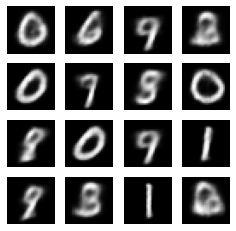

In [23]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)

In [24]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [25]:
def plot_latent_images(model, n, digit_size=28):
  """Plots n x n digit images decoded from the latent space."""

  norm = tfp.distributions.Normal(0, 1)
  grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
  grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
  image_width = digit_size*n
  image_height = image_width
  image = np.zeros((image_height, image_width))

  for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
      z = np.array([[xi, yi]])
      x_decoded = model.sample(z)
      digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
      image[i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit.numpy()

  plt.figure(figsize=(10, 10))
  plt.imshow(image, cmap='Greys_r')
  plt.axis('Off')
  plt.show()

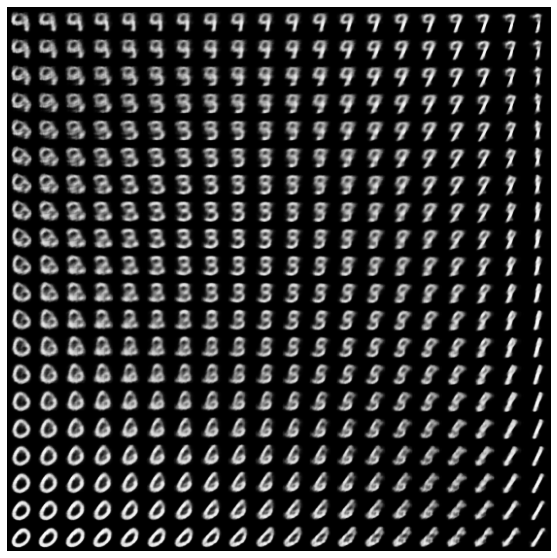

In [26]:
plot_latent_images(model, 20)

## Example #2:
Example taken from: https://keras.io/examples/generative/vae/

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [29]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 14, 14, 32)   320         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 7, 7, 64)     18496       conv2d_4[0][0]                   
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 3136)         0           conv2d_5[0][0]                   
____________________________________________________________________________________________

In [30]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

In [31]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [32]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 3s 4ms/step - loss: 264.2462 - reconstruction_loss: 213.9432 - kl_loss: 2.2175
Epoch 2/30
547/547 [==============================] - 2s 4ms/step - loss: 189.4835 - reconstruction_loss: 184.6039 - kl_loss: 3.1839
Epoch 3/30
547/547 [==============================] - 2s 4ms/step - loss: 183.2323 - reconstruction_loss: 176.9187 - kl_loss: 3.9704
Epoch 4/30
547/547 [==============================] - 2s 4ms/step - loss: 169.8779 - reconstruction_loss: 162.5520 - kl_loss: 5.8341
Epoch 5/30
547/547 [==============================] - 2s 4ms/step - loss: 164.8924 - reconstruction_loss: 158.3203 - kl_loss: 6.1277
Epoch 6/30
547/547 [==============================] - 2s 4ms/step - loss: 162.4578 - reconstruction_loss: 155.9429 - kl_loss: 6.2036
Epoch 7/30
547/547 [==============================] - 2s 4ms/step - loss: 161.0512 - reconstruction_loss: 154.3923 - kl_loss: 6.2703
Epoch 8/30
547/547 [==============================] - 2s 4ms/step - l

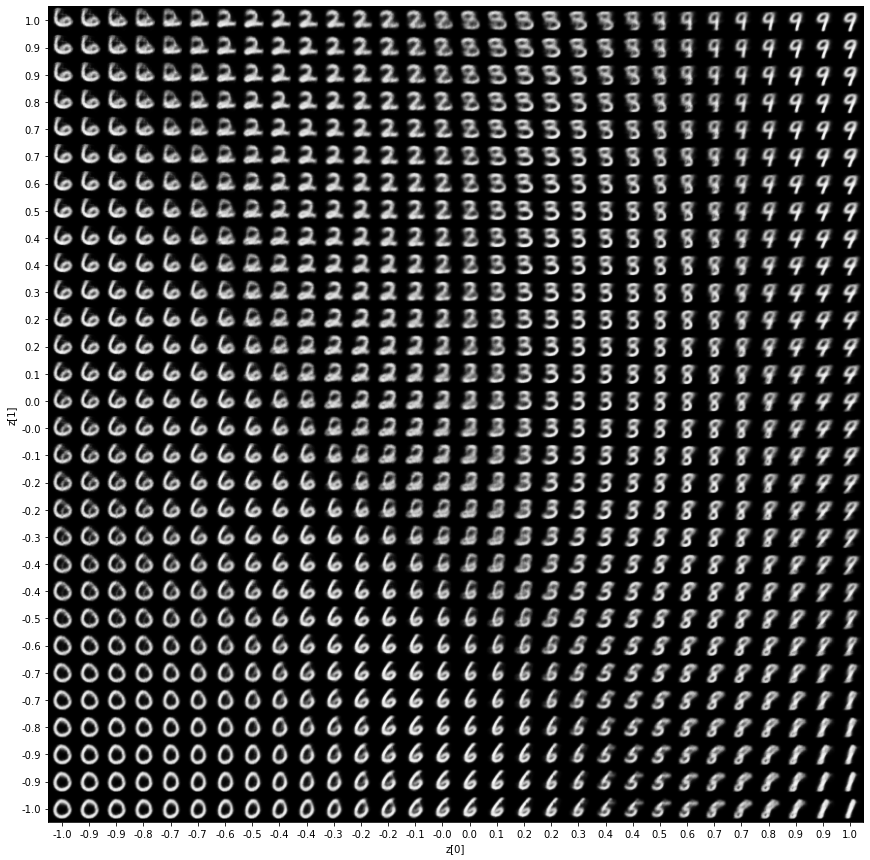

In [33]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

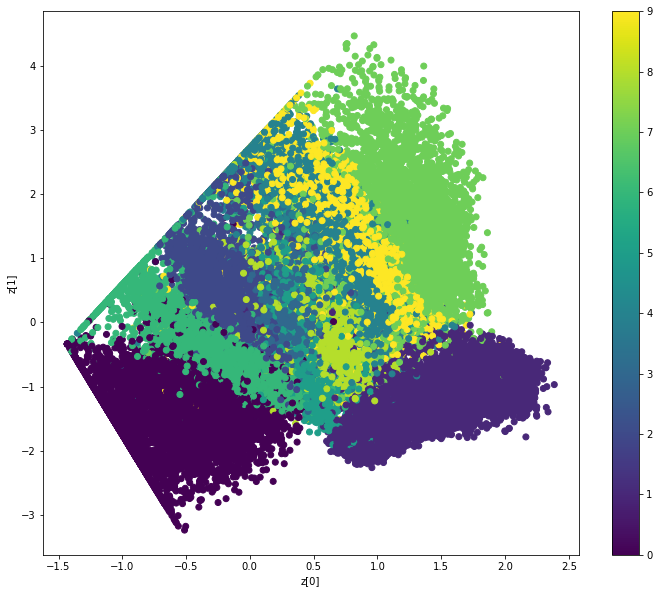

In [34]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)